<a href="https://colab.research.google.com/github/Roshk01/Mental_health_report_prediction_model-/blob/main/mentalhealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import the important libraries for algorithms**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# **Get the data**

In [ ]:
datapre = pd.read_csv("/prevalence-by-mental-and-substance-use-disorder.csv")
datamen = pd.read_csv("/mental-and-substance-use-as-share-of-disease.csv")

In [ ]:
data = pd.merge(datapre,datamen)
data.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


In [ ]:
from sqlalchemy import true
data.isnull().sum()
data.drop('Code',axis=1,inplace = True)

KeyError: ignored

In [ ]:
data.head()

,Entity,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


In [ ]:
data.set_axis(["country","year","Schizophrenia","Bipolar disorder","Eating disorders","Anxiety disorders","Drug use disorders","Depressive disorders","Alcohol use disorders","Mental disorders"],axis = 'columns', inplace = True)
data.head()

<ipython-input-25-97dcedb15e54>:1: FutureWarning:

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead



,country,year,Schizophrenia,Bipolar disorder,Eating disorders,Anxiety disorders,Drug use disorders,Depressive disorders,Alcohol use disorders,Mental disorders
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


<ipython-input-39-16719c1f9f11>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



[]

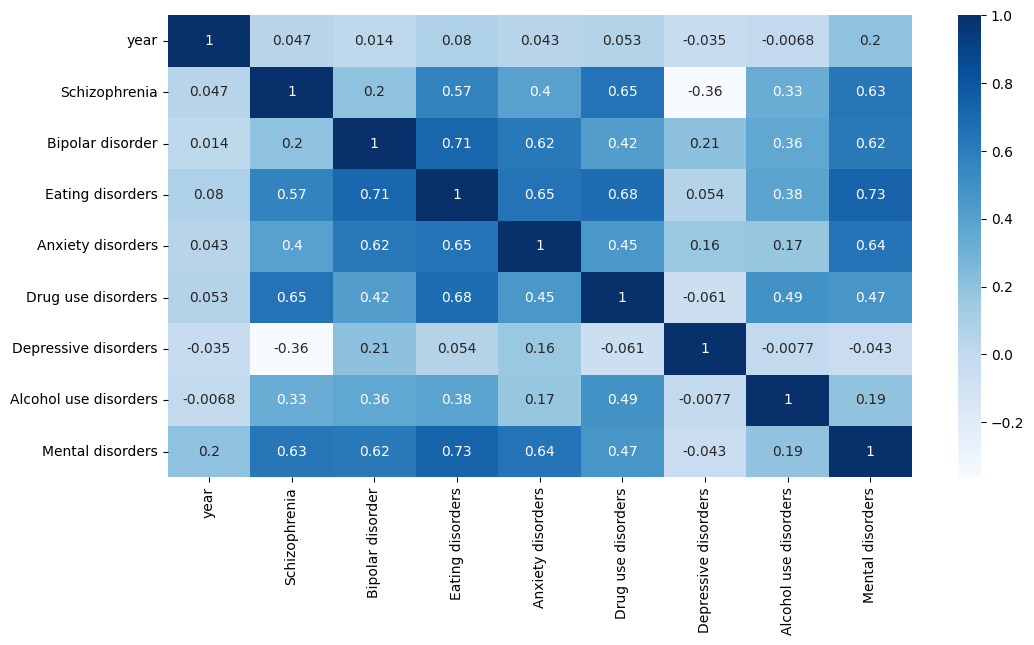

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot = True,cmap='Blues')
plt.plot()

In [ ]:
mean = data['Mental disorders'].mean()
mean

4.8180618117506135

In [ ]:
fig = px.pie(data,values='Mental disorders',names='year')
fig.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

for i in data.columns:
  if data[i].dtype == 'object':
    data[i] = l.fit_transform(data[i])

In [ ]:
x = data.drop('Mental disorders',axis = 1)
y = data['Mental disorders']

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 20, random_state = 2)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr = LinearRegression()
lr.fit(xtrain,ytrain)

y_train_prediction = lr.predict(xtrain)
sqre = mean_squared_error(ytrain,y_train_prediction)

rmse = (np.sqrt(sqre))

r2 = r2_score(ytrain,y_train_prediction)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(xtrain,ytrain)

y_rtrain_prediction = rfr.predict(xtrain)

sqre2 = mean_squared_error(ytrain,y_rtrain_prediction)

rmse2 = np.sqrt(sqre2)

rfr2 = r2_score(ytrain,y_rtrain_prediction)


In [ ]:
print("Linear Regression algorithm: ")
print("**********************************")
print("MSE: {} ".format(sqre))
print("RMSE: {} ".format(rmse))
print("R2: {} ".format(r2))
print(" \n\n\n")

print("Random Forest Regression algorithm: ")
print("**********************************")
print("MSE: {} ".format(sqre2))
print("RMSE: {} ".format(rmse2))
print("R2: {} ".format(rfr2))


Linear Regression algorithm: 
**********************************
MSE: 1.3399913707005786 
RMSE: 0.06165552016373975 
R2: 0.7453536323041361 
 



Random Forest Regression algorithm: 
**********************************
MSE: 0.003646225719079235 
RMSE: 0.060383985617705256 
R2: 0.9993070864817007 
